In [1]:
from typing_extensions import TypedDict
from typing import Literal
class Stateclass(TypedDict):
    name:str
    skill:Literal['LangChain','LangGraph']
    

In [19]:
'''
def Learn(state:Stateclass):
       return {"name":state['name']+"wants to learn "}
def LC(state:Stateclass):
       return {"name":state['name']+"LC","skill":"LC"}
def LG(state:Stateclass):
       return {"name":state['name']+"LG","skill":"LG"}------>LITERAL IS ONLY ['LangChain','LangGraph']....NOT LC AND LG
    
'''
def Learn(state:Stateclass):
       return {"name":state['name']+" wants to learn "}
def LC(state:Stateclass):
       return {"name":state['name']+"LC","skill":"LangChain"}
def LG(state:Stateclass):
       return {"name":state['name']+"LG","skill":"LangGraph"}

In [20]:
'''
import random
def ran_pick(state:Stateclass)->Literal["LC","LG"]:
    if random.random()>0.5:
        return 'LC'
    else:
        return 'LG'----------->return value SHOUL ALWAYS BE NODE NAME (NOT THE FUNCTION NAME)
        '''
import random
def ran_pick(state:Stateclass)->Literal["LangChain","LangGraph"]:
    if random.random()>0.5:
        return 'LangChain'
    else:
        return 'LangGraph'

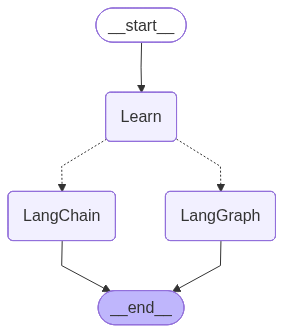

In [21]:
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image

graph_builder=StateGraph(Stateclass)
graph_builder.add_node("Learn",Learn)
graph_builder.add_node("LangChain",LC)
graph_builder.add_node("LangGraph",LG)

graph_builder.add_edge(START,"Learn")
graph_builder.add_conditional_edges("Learn",ran_pick)
graph_builder.add_edge("LangChain",END)
graph_builder.add_edge("LangGraph",END)

builder=graph_builder.compile()

display(Image(builder.get_graph().draw_mermaid_png()))


In [22]:
builder.invoke({"name":"sri",
                "skill":"LangChain"
                })

{'name': 'sri wants to learn LG', 'skill': 'LangGraph'}

ANOTHER WAY TO REPRESENT STRUCTURED DATA

DATA CLASSES

In [24]:
from dataclasses import dataclass

@dataclass
class datastate:
    name:str
    skill:Literal['LangChain','LangGraph']
    


In [34]:
#state['name'] becomes state.name
def Learn(state:datastate):
       return {"name":state.name+" wants to learn "}
def LC(state:datastate):
       return {"name":state.name+"LC","skill":"LangChain"}
def LG(state:datastate):
       return {"name":state.name+"LG","skill":"LangGraph"}

In [31]:
import random
def ran_pick(state:datastate)->Literal["LangChain","LangGraph"]:
    if random.random()>0.5:
        return 'LangChain'
    else:
        return 'LangGraph'

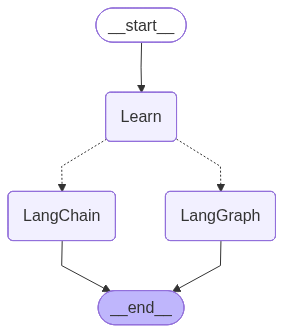

In [32]:
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image

graph_builder=StateGraph(datastate)
graph_builder.add_node("Learn",Learn)
graph_builder.add_node("LangChain",LC)
graph_builder.add_node("LangGraph",LG)

graph_builder.add_edge(START,"Learn")
graph_builder.add_conditional_edges("Learn",ran_pick)
graph_builder.add_edge("LangChain",END)
graph_builder.add_edge("LangGraph",END)

builder=graph_builder.compile()

display(Image(builder.get_graph().draw_mermaid_png()))


In [33]:
builder.invoke(datastate(name='sri',skill="LangChain"))

{'name': 'sri wants to learn LC', 'skill': 'LangChain'}

these two structures of state schema representation can't handle vadilation of the data type as they are not enforced at the run time